<a href="https://colab.research.google.com/github/cbsheffi/PDSwR2/blob/master/Copy_of_01_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step By Step Tutorial On Clustering Models Using Python
### A Comparision of k-means clustering, hierachical clustering, Gaussian mixed model, and DBSCAN
Author: Amy Zhuang

## Mount Google Drive


In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Copyright 2019 Google Inc.

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at

#     http://www.apache.org/licenses/LICENSE-2.0

# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Verify GPU and TPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import os
if 'COLAB_TPU_ADDR' not in os.environ:
  print('Not connected to TPU')
else:
  print("Connected to TPU")

Not connected to TPU


Clustering model is a type of unsupervised model that is commonly used to segmenting similar objects into groups. Data from the same group have similar characteristics and attributes. There are four main typs of clustering models:

## Types Of Clustering Models

*   Centroid Model: K-means clustering is an example of a centroid model. This type of clustering model uses the distance between a data point and the centroid of the cluster to group data.
*   Distribution Model: Gaussian Mixed Model (GMM) is a popular distribution model. This type of clustering model segments data based on their probability of belonging to the same distribution.
*   Connectivity Model: Hierachical Clustering Model is a commonly used connectivity model. This type of clustering model use the closeness of the data points to decide the clusters.
*   Density Model: Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a popular density model. This type of clustering model scans the data space and assign clusters based on the density of data points.

In this tutorial, step by step implementation of different clustering models in Python will be provided. To be specific, the following topics will be covered:

*   How to decide the number of clusters for a model?
*   K-means clustering model
*   Gaussian Mixed Model (GMM)
*   Hierachical Clustering Model
*   Density-Based Spatial Clustering of Applications with Noise (DBSCAN) 

Let's get started!

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Readin Data

We are using the iris dataset for this tutorial. This dataset contains 150 records for 3 types of iris flowers. Sepal length, sepal width, petal lengh and petal width are the features. We also have the actual type of the flowers as labels. Although the label will not be used for the clustering model, it provides the ground truth to evaluate the model performance.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
X = df[df.columns.difference(['target'])]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


## Number of Clusters

### Elbow Method

Elbow method runs clutering model for a range of cluster numbers and plot the within cluster sum of squares. The elbow on the plot shows the optimal number of cluster.

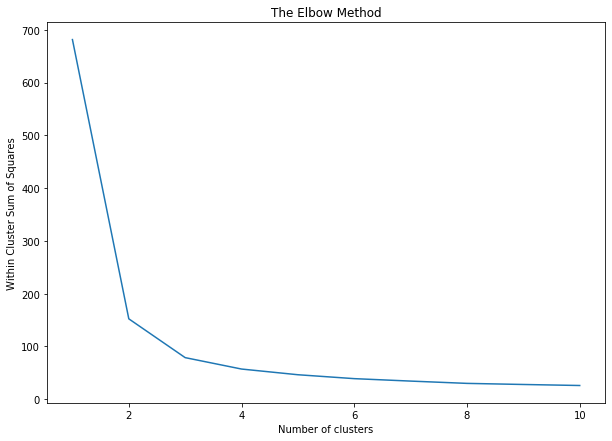

In [ ]:
wcss = [] # Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster
plt.figure(figsize=(10, 7))  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

### Silhouette Score
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. Values close to 1 mean that the data are appropriately clustered. If the returned value is close to -1 then the data more likely belongs in the neighboring cluster. A value of 0 indicates that the data resides on the border of two natural clusters.

In [ ]:

from sklearn.metrics import silhouette_score
for i in range(2, 11): # Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1
    kmeans = KMeans(n_clusters = i,  random_state = 42)
    kmeans.fit(X)
    classes = kmeans.predict(X)
    print(silhouette_score(X, classes, metric='euclidean'))

0.6810461692117462
0.5528190123564097
0.49805050499728737
0.4887488870931055
0.3648340039670026
0.34750423280461673
0.3617900335973817
0.34022340175905735
0.30749823702318574


The visualization code is on sklearn documentation: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

### Hierachical Clustering Graph

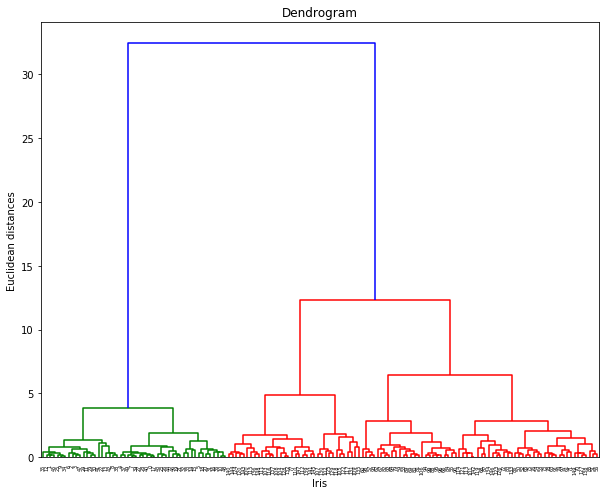

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(X))

plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()

### AIC and BIC from GMM

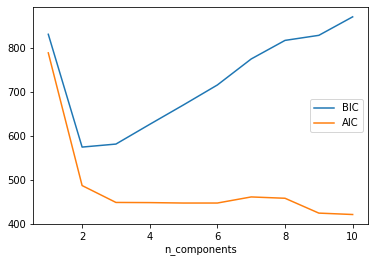

In [ ]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### Gap Statistics
Another way of choosing the optimal number of clusters is to use gap statistics. An example is here: https://anaconda.org/milesgranger/gap-statistic/notebook

In [ ]:
def optimalK(data, nrefs=3, maxClusters=10):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [ ]:
k, gapdf = optimalK(X, nrefs=2, maxClusters=10)
print('Optimal k is: ', k)

Optimal k is:  8


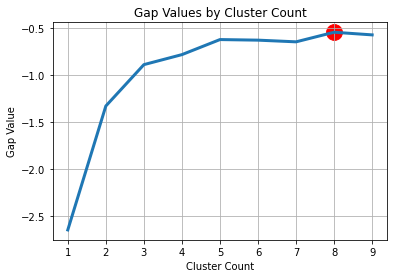

In [ ]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

## Kmeans Clustering

### Fit the Kmeans Clustering Model

In [ ]:
kmeans = KMeans(n_clusters = 3,  random_state = 42)
y_kmeans = pd.DataFrame(kmeans.fit_predict(X),columns=['y_kmeans'])
dfKmeans = pd.concat([X,y_kmeans], axis=1)

In [ ]:
dfKmeans['y_kmeans'].value_counts()

0    62
1    50
2    38
Name: y_kmeans, dtype: int64

In [ ]:
# Rename the labels to make them consistent with the target in visualization color
dfKmeans['y_kmeans'] = dfKmeans['y_kmeans'].map({1:0,0:1,2:2})
dfKmeans['y_kmeans'].value_counts()

1    62
0    50
2    38
Name: y_kmeans, dtype: int64

### Visualization of Predicted Clusters

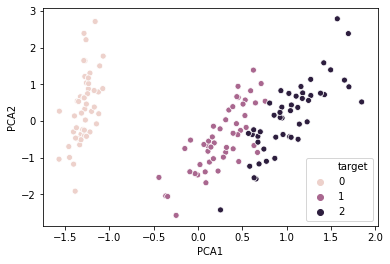

In [ ]:
# True Clusters
pca = PCA(n_components=2, whiten=True)

df['PCA1'] = pca.fit_transform(df[df.columns.difference(['target'])])[:, 0]
df['PCA2'] = pca.fit_transform(df[df.columns.difference(['target'])])[:, 1]
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=df)

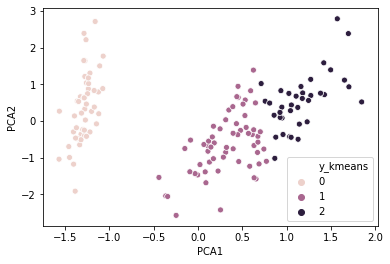

In [ ]:
# Kmeans Predectied Clusters
pca = PCA(n_components=2, whiten=True)

dfKmeans['PCA1'] = pca.fit_transform(X)[:, 0]
dfKmeans['PCA2'] = pca.fit_transform(X)[:, 1]
sns.scatterplot(x='PCA1', y='PCA2', hue='y_kmeans', data=dfKmeans)

In [ ]:
print(pd.DataFrame(pca.components_,columns=X.columns,index = ['PCA1','PCA2']))

      petal length (cm)  petal width (cm)  sepal length (cm)  sepal width (cm)
PCA1           0.856671          0.358289           0.361387         -0.084523
PCA2          -0.173373         -0.075481           0.656589          0.730161


In [ ]:
X_pc = pca.fit_transform(X)
# number of components
n_pcs= pca.components_.shape[0]
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X.columns
initial_feature_names
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# using LIST COMPREHENSION HERE AGAIN
dic = {'PCA{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
pcaImportantVar = pd.DataFrame(sorted(dic.items()))
pcaImportantVar

,0,1
0,PCA1,petal length (cm)
1,PCA2,sepal width (cm)


### T-distributed Stochastic Neighbor Embedding (t-SNE) Placeholder

### Visualize Differentiatial Variables

In [ ]:
avg = pd.DataFrame(dfKmeans.groupby(['y_kmeans']).mean().reset_index())
avg

,y_kmeans,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),PCA1,PCA2
0,0,1.462000,0.246000,5.006000,3.428000,-1.285053,0.387492
1,1,4.393548,1.433871,5.901613,2.748387,0.328587,-0.639859
2,2,5.742105,2.071053,6.850000,3.073684,1.154745,0.534122


In [ ]:
avg.columns


Index(['y_kmeans', 'petal length (cm)', 'petal width (cm)',
       'sepal length (cm)', 'sepal width (cm)', 'PCA1', 'PCA2'],
      dtype='object')

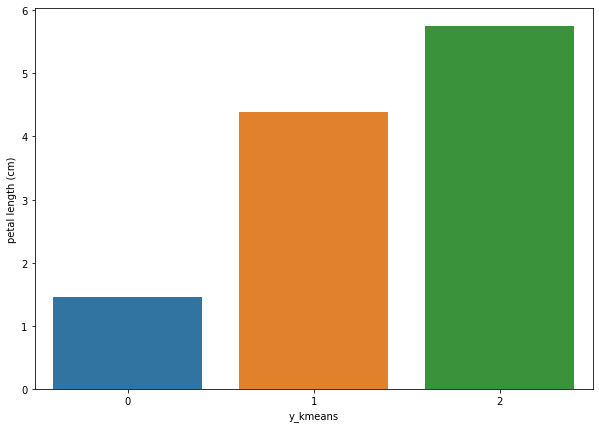

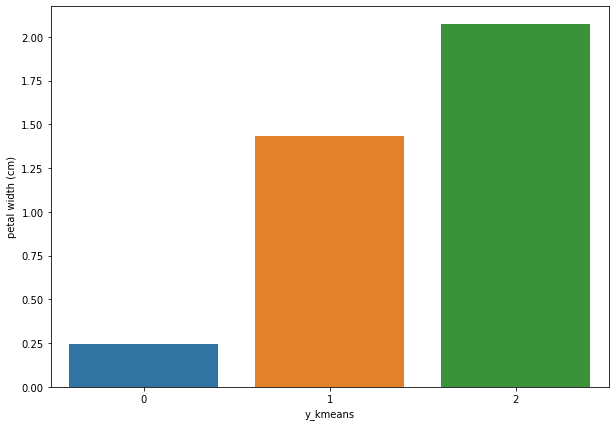

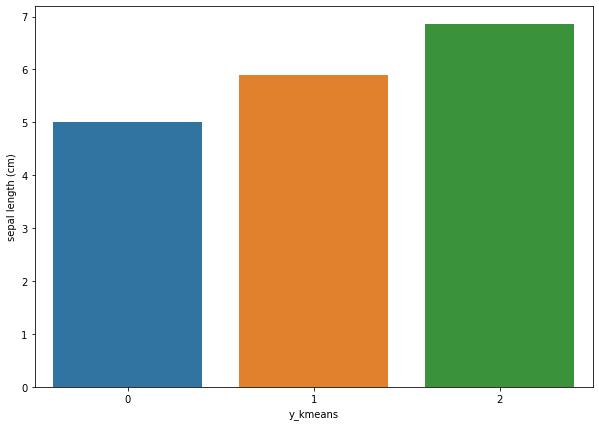

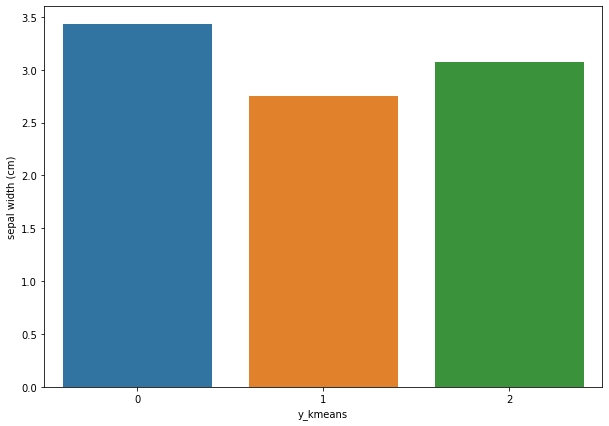

In [ ]:
varList = ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
for i in varList:
    plt.figure(figsize=(10, 7))
    sns.barplot(x='y_kmeans',y=i,data=avg)

## Hierachical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean')
y_hc = pd.DataFrame(hc.fit_predict(X), columns=['y_hc'])
dfHC = pd.concat([X,y_hc], axis=1)

In [ ]:
dfHC['y_hc'].value_counts()

0    64
1    50
2    36
Name: y_hc, dtype: int64

## Gaussian Mixture Model (GMM)
To do:
DPGMM
Infinite gaussian mixture model, using the dirichlet process, fit with a variational algorithm
VBGMM
Finite gaussian mixture model fit with a variational algorithm, better for situations where there might be too little data to get a good estimate of the covariance matrix.

In [ ]:
# from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm = pd.DataFrame(gmm.fit_predict(X), columns=['y_gmm'])
dfGMM = pd.concat([X, y_gmm], axis=1)

In [ ]:
dfGMM['y_gmm'].value_counts()

1    55
2    50
0    45
Name: y_gmm, dtype: int64

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:100].round(3))

## Density-based spatial clustering of applications with noise (DBSCAN) 

In [ ]:
dbscan = DBSCAN(eps=0.25, min_samples=5) 
y_dbscan = pd.DataFrame(dbscan.fit_predict(X), columns=['y_dbscan'])
dfDBSCAN = pd.concat([X, y_dbscan], axis=1)
dfDBSCAN['y_dbscan'].value_counts()

-1    112
 0     33
 1      5
Name: y_dbscan, dtype: int64

`eps` is the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
y_dbscan = pd.DataFrame(dbscan.fit_predict(X), columns=['y_dbscan'])
dfDBSCAN = pd.concat([X, y_dbscan], axis=1)
dfDBSCAN['y_dbscan'].value_counts()

 1    84
 0    49
-1    17
Name: y_dbscan, dtype: int64

## OPTICS (Ordering Points To Identify the Clustering Structure)

In [ ]:
optics = OPTICS(min_samples=5)
y_optics = pd.DataFrame(optics.fit_predict(X), columns=['y_optics'])
dfOPTICS = pd.concat([X, y_optics], axis=1)
dfOPTICS['y_optics'].value_counts()

-1    87
 2    15
 0    14
 5    12
 3    10
 1     7
 4     5
Name: y_optics, dtype: int64

In [ ]:
optics = OPTICS(min_samples=15)
y_optics = pd.DataFrame(optics.fit_predict(X), columns=['y_optics'])
dfOPTICS = pd.concat([X, y_optics], axis=1)
dfOPTICS['y_optics'].value_counts()

1    100
0     50
Name: y_optics, dtype: int64

# Clustering for Cateogrical Variables

## K-Modes

# Clustering for Data with Both Categorical and Continuous Variables

## K-Prototypes

## Text Clustering